# Visiallize the fractal set

In [135]:
import numpy as np
import matplotlib.pyplot as plt

In [136]:
def lossf(x,delta,wl):
    return x**2 * (1 + delta * np.cos(2*np.pi*x / wl))

In [137]:
x = np.linspace(-2,2,1000)
y = lossf(x, 0.2, 0.1)

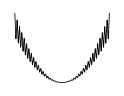

In [138]:
plt.figure(figsize=(3.375/3, 3.375/12*3), constrained_layout=True)
plt.plot(x,y,'k',linewidth = .6)
plt.axis('off')
plt.savefig('./figures/example1.eps')

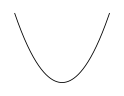

In [139]:
plt.figure(figsize=(3.375/3, 3.375/12*3), constrained_layout=True)
plt.plot(x,x**2,'k',linewidth = .6)
plt.axis('off')
plt.savefig('./figures/quadr.eps')

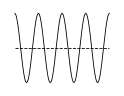

In [140]:
plt.figure(figsize=(3.375/3, 3.375/12*3), constrained_layout=True)
plt.plot(x, 1 + 0.2 * np.cos(2*np.pi*x),'k',linewidth = .6)
plt.plot(x,np.ones(x.shape[0]),'--k',linewidth = .6)
plt.axis('off')
plt.savefig('./figures/cos.eps')

In [141]:
def gradf(x,delta,wl):
    return 2*x*(1 + delta * np.cos(2*np.pi*x / wl)) - 2*np.pi*x**2 * delta * np.sin(2*np.pi*x / wl) / wl

def GD(x0, lr, steps, delta, wl):
    x_traj = np.zeros(steps+1)
    x_traj[0] = x0
    loss_traj = - np.ones(steps+1)
    loss_traj[0] = lossf(x0,delta,wl)
    for i in range(steps):
        x_traj[i+1] = x0 - lr * gradf(x0,delta,wl)
        x0 = x_traj[i+1]
        loss_traj[i+1] = lossf(x0,delta,wl)
        if loss_traj[i+1] > 1e+8:
            loss_traj[i+1] = -1
            break
    return loss_traj, x_traj

In [142]:
nn = 10
s_span = np.linspace(0,1.5,2**nn+1)
results = - np.ones(2**nn+1) # 0 must be -1

for i in range(2**nn):
    # 0 already known
    s = s_span[i+1]
    loss_traj, _ = GD(1.0, s, 1000, .2, .1)
    if loss_traj[-1] == -1:
        results[i+1] = 1

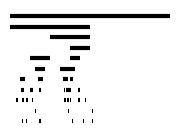

In [143]:
plt.figure(figsize=(3.375/2, 3.375/8*3), constrained_layout=True)
for ni in range(nn+1):
    nidx = np.arange(2**ni+1) * 2**(nn-ni)
    nresult = results[nidx]
    plt.hlines((nresult[:-1] != nresult[1:]).astype(float) * (1-0.8/nn*ni)
               , np.linspace(0,1.5,2**ni+1)[:-1], np.linspace(0,1.5,2**ni+1)[1:],'k',linewidth = 3)
plt.ylim(0.15, 1.05)
plt.xlim(0, 1.5)
plt.axis('off')
plt.savefig('./figures/fractlines.eps')